In [ ]:
import os
os.chdir('drive/MyDrive/AI201715064')

In [ ]:
# knn 모델
# n_neighbors:모델이 각 데이터 포인트의 예측을 수행할 때 고려할 이웃의 수를 의미한다.ex)n_neighbors=5라면, 새로운 데이터 포인트의 클래스를 결정할 때 가장 가까운 5개의 이웃 데이터 포인트를 참고한다는 뜻이다.
# weights:이웃의 기여도를 결정하는 방법을 의미한다. 이웃의 기여도를 가중치로 나타낸다.
# algorithm:최근접 이웃 검색에 사용되는 알고리즘을 의미한다.
# p:거리 계산에 사용할 Minkowski 거리의 파라미터를 의미한다. p 값에 따라 다른 유형의 거리를 계산한다.

# SVM 모델
# C:정규화 매개변수로, 학습 데이터의 오차에 대한 페널티를 조절한다. C 값이 클수록 오차에 대해 더 큰 페널티를 부여하여, 학습 데이터에 대한 정확도를 높이는 방향으로 작용한다. 즉, 과적합(overfitting)의 위험이 커질 수 있다. 반대로 C 값이 작을수록 더 큰 마진을 허용하여, 과적합을 방지하는 방향으로 작용한다.
# kernel: SVM에서 데이터를 고차원 공간으로 변환하는 데 사용하는 커널 함수의 종류를 의미한다.
# gamma: RBF, 다항, 시그모이드 커널에서 사용하는 매개변수로, 데이터 포인트의 영향력을 조절한다. gamma 값이 클수록 단일 데이터 포인트의 영향력이 커져 결정 경계가 더 복잡해지고, 작을수록 영향력이 줄어들어 결정 경계가 단순해진다.
# degree:다항 커널(poly)을 사용할 때 다항식의 차수를 의미한다. 즉, 커널 함수의 복잡도를 결정한다고 할 수 있다. degree 값이 클수록 더 복잡한 모델이 만들어지며, 작은 값일수록 단순한 모델이 만들어진다.

# 결정트리 모델
# criterion: 분할의 품질을 측정하는 기준을 의미한다.
# max_depth: 트리의 최대 깊이를 설정한다. 트리의 깊이가 깊을수록 모델은 더 복잡해지며, 과적합(overfitting)의 위험이 커진다. 반대로 깊이가 너무 얕으면 모델이 충분히 학습하지 못해 과소적합(underfitting)이 발생할 수 있다.
# min_samples_split:내부 노드를 분할하기 위한 최소 샘플 수를 설정한다. 이 값이 크면 노드가 분할되기 위해 더 많은 샘플이 필요하므로 트리가 덜 복잡해지고 과적합을 방지할 수 있다.
# min_samples_leaf: 리프 노드가 되기 위한 최소 샘플 수를 설정한다. 이 값이 크면 리프 노드가 되기 위해 더 많은 샘플이 필요하므로 트리가 덜 복잡해지고 과적합을 방지할 수 있다.
# max_features: 각 분할에서 고려할 최대 특징 수를 설정한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_roc_auc_manual(y_true, y_proba):
    thresholds = np.sort(np.unique(y_proba))[::-1]
    tpr_list = []
    fpr_list = []

    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)

    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tn = np.sum((y_true == 0) & (y_pred == 0))

        tpr = tp / P
        fpr = fp / N

        tpr_list.append(tpr)
        fpr_list.append(fpr)

    # Calculate AUC using the Trapezoidal Rule
    fpr_list = np.array(fpr_list)
    tpr_list = np.array(tpr_list)
    auc_value = np.trapz(tpr_list, fpr_list)

    return fpr_list, tpr_list, auc_value

def plot_confusion_matrix(y_test, cm, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test))
    plt.yticks(tick_marks, np.unique(y_test))

    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, title):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

def calculate_confusion_matrix(y_true, y_pred):
    unique_labels = np.unique(y_true)
    cm = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)
    for true, pred in zip(y_true, y_pred):
        cm[true][pred] += 1
    return cm

def calculate_f1_score(y_true, y_pred):
    # True Positives (TP), False Positives (FP), False Negatives (FN), True Negatives (TN) 계산
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tn = np.sum((y_true == 0) & (y_pred == 0))

    # Precision, Recall 계산
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    # F1-score 계산
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [ ]:
# Iris 데이터셋 로드
iris = datasets. load_iris()
X_data = iris.data
y_data = iris.target

print (X_data.shape, y_data.shape)

(150, 4) (150,)


In [ ]:
X_data = X_data[:100, :2]
y_data = y_data[:100]

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train[:10]

(80, 2) (20, 2) (80,) (20,)


array([[5.7, 2.8],
       [5.6, 3. ],
       [5. , 3.4],
       [4.4, 3.2],
       [5.6, 2.5],
       [5.7, 4.4],
       [5. , 3.5],
       [5.7, 2.9],
       [4.9, 3.1],
       [6.3, 2.5]])

/content/drive/MyDrive/AI201715064/draw_plot.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


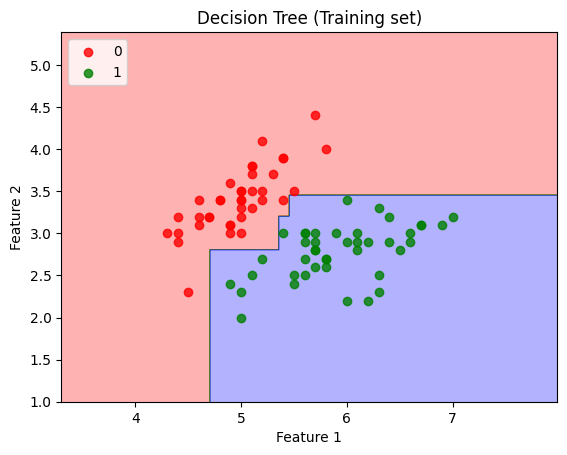

/content/drive/MyDrive/AI201715064/draw_plot.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


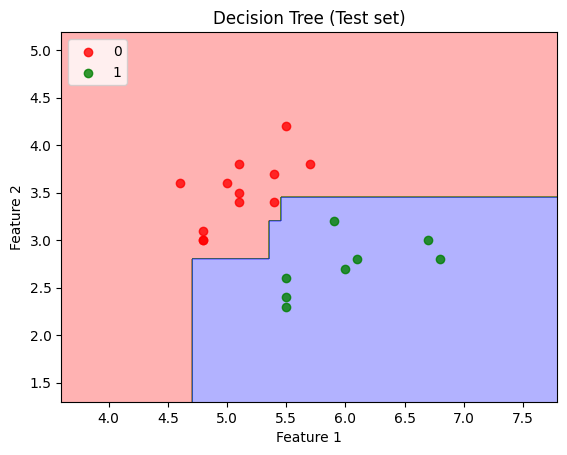

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 모델 학습
tree = DecisionTreeClassifier(random_state=42)
tree. fit(X_train, y_train)

# 학습 과정 시각화
plot_decision_boundary(X_train, y_train, tree, "Decision Tree (Training set)")
plot_decision_boundary(X_test, y_test, tree, "Decision Tree (Test set)")

/content/drive/MyDrive/AI201715064/draw_plot.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


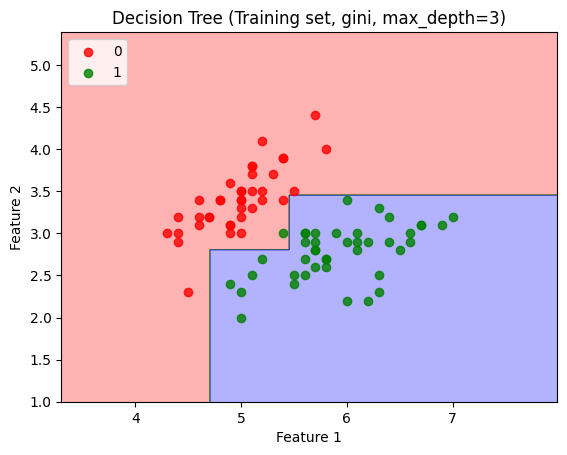

/content/drive/MyDrive/AI201715064/draw_plot.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


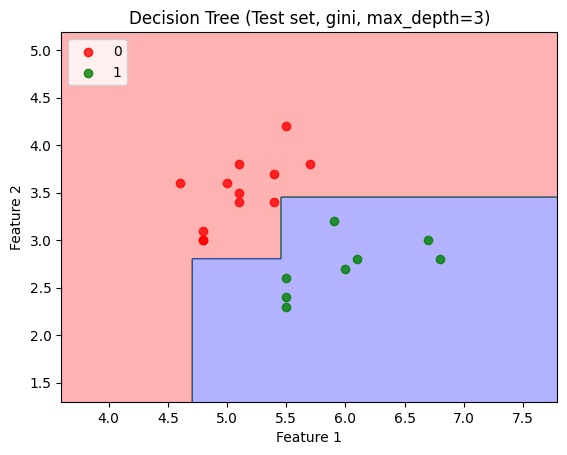

In [ ]:
# 결정 트리 모델 학습
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# 모델 학습 과정 시각화
plot_decision_boundary(X_train, y_train, tree, "Decision Tree (Training set, gini, max_depth=3)")
plot_decision_boundary(X_test, y_test, tree, "Decision Tree (Test set, gini, max_depth=3)")

/content/drive/MyDrive/AI201715064/draw_plot.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


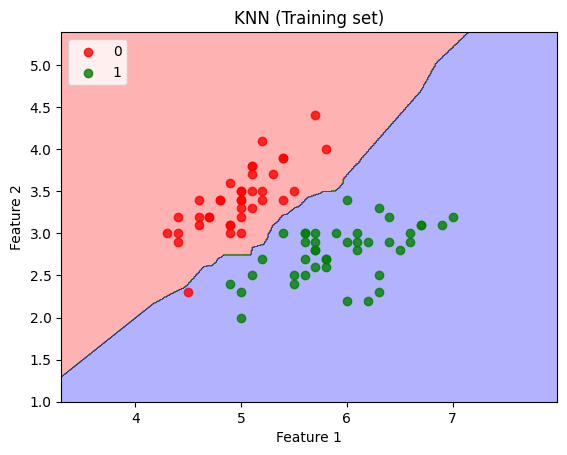

/content/drive/MyDrive/AI201715064/draw_plot.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


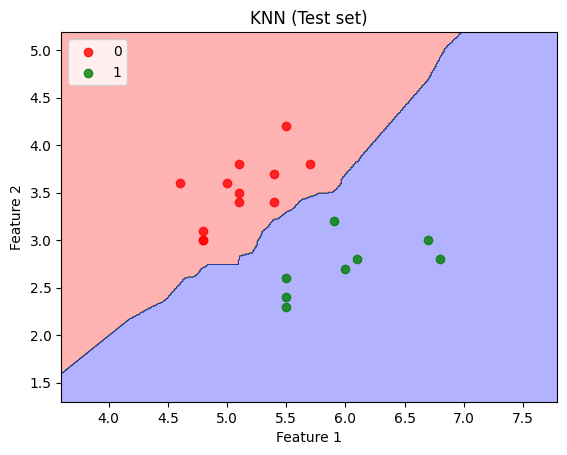

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from draw_plot import plot_decision_boundary

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 학습 과정 시각화
plot_decision_boundary(X_train, y_train, knn, "KNN (Training set)")
plot_decision_boundary(X_test, y_test, knn, "KNN (Test set)")

/content/drive/MyDrive/AI201715064/draw_plot.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


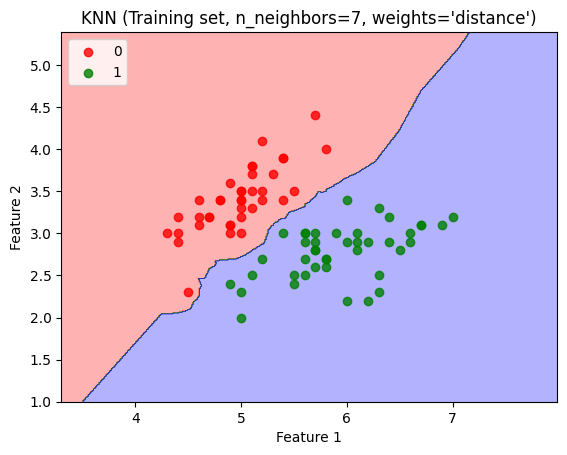

/content/drive/MyDrive/AI201715064/draw_plot.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


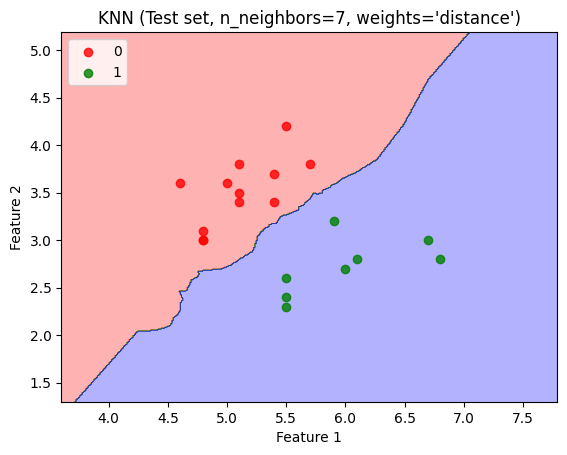

In [ ]:
# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_train, y_train)

# 모델 학습 과정 시각화
plot_decision_boundary(X_train, y_train, knn, "KNN (Training set, n_neighbors=7, weights='distance')")
plot_decision_boundary(X_test, y_test, knn, "KNN (Test set, n_neighbors=7, weights='distance')")

In [ ]:
!jupyter nbconvert --to html "뇌과학_과제.ipynb"

[NbConvertApp] Converting notebook 뇌과학_과제.ipynb to html
[NbConvertApp] Writing 876377 bytes to 뇌과학_과제.html
